#Importing libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset

##1. **Load the data** into a Python session using Pandas, and then inspect the types of the columns.

In [9]:
file_path = 'auto-mpg.csv'
auto_mpg_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the data types of each column
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [10]:
auto_mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Splitting the data into training and testing sets

2. **Split the data into** 75% for training, and 25% testing.

In [11]:
train_data, test_data = train_test_split(auto_mpg_data, test_size=0.25, random_state=42)
train_data.shape, test_data.shape

((298, 9), (100, 9))

# Setting up the aesthetics for seaborn plots

##3. **Visualize the data** to classify the columns based on being symmetric, skewed, or categorical and numeric.

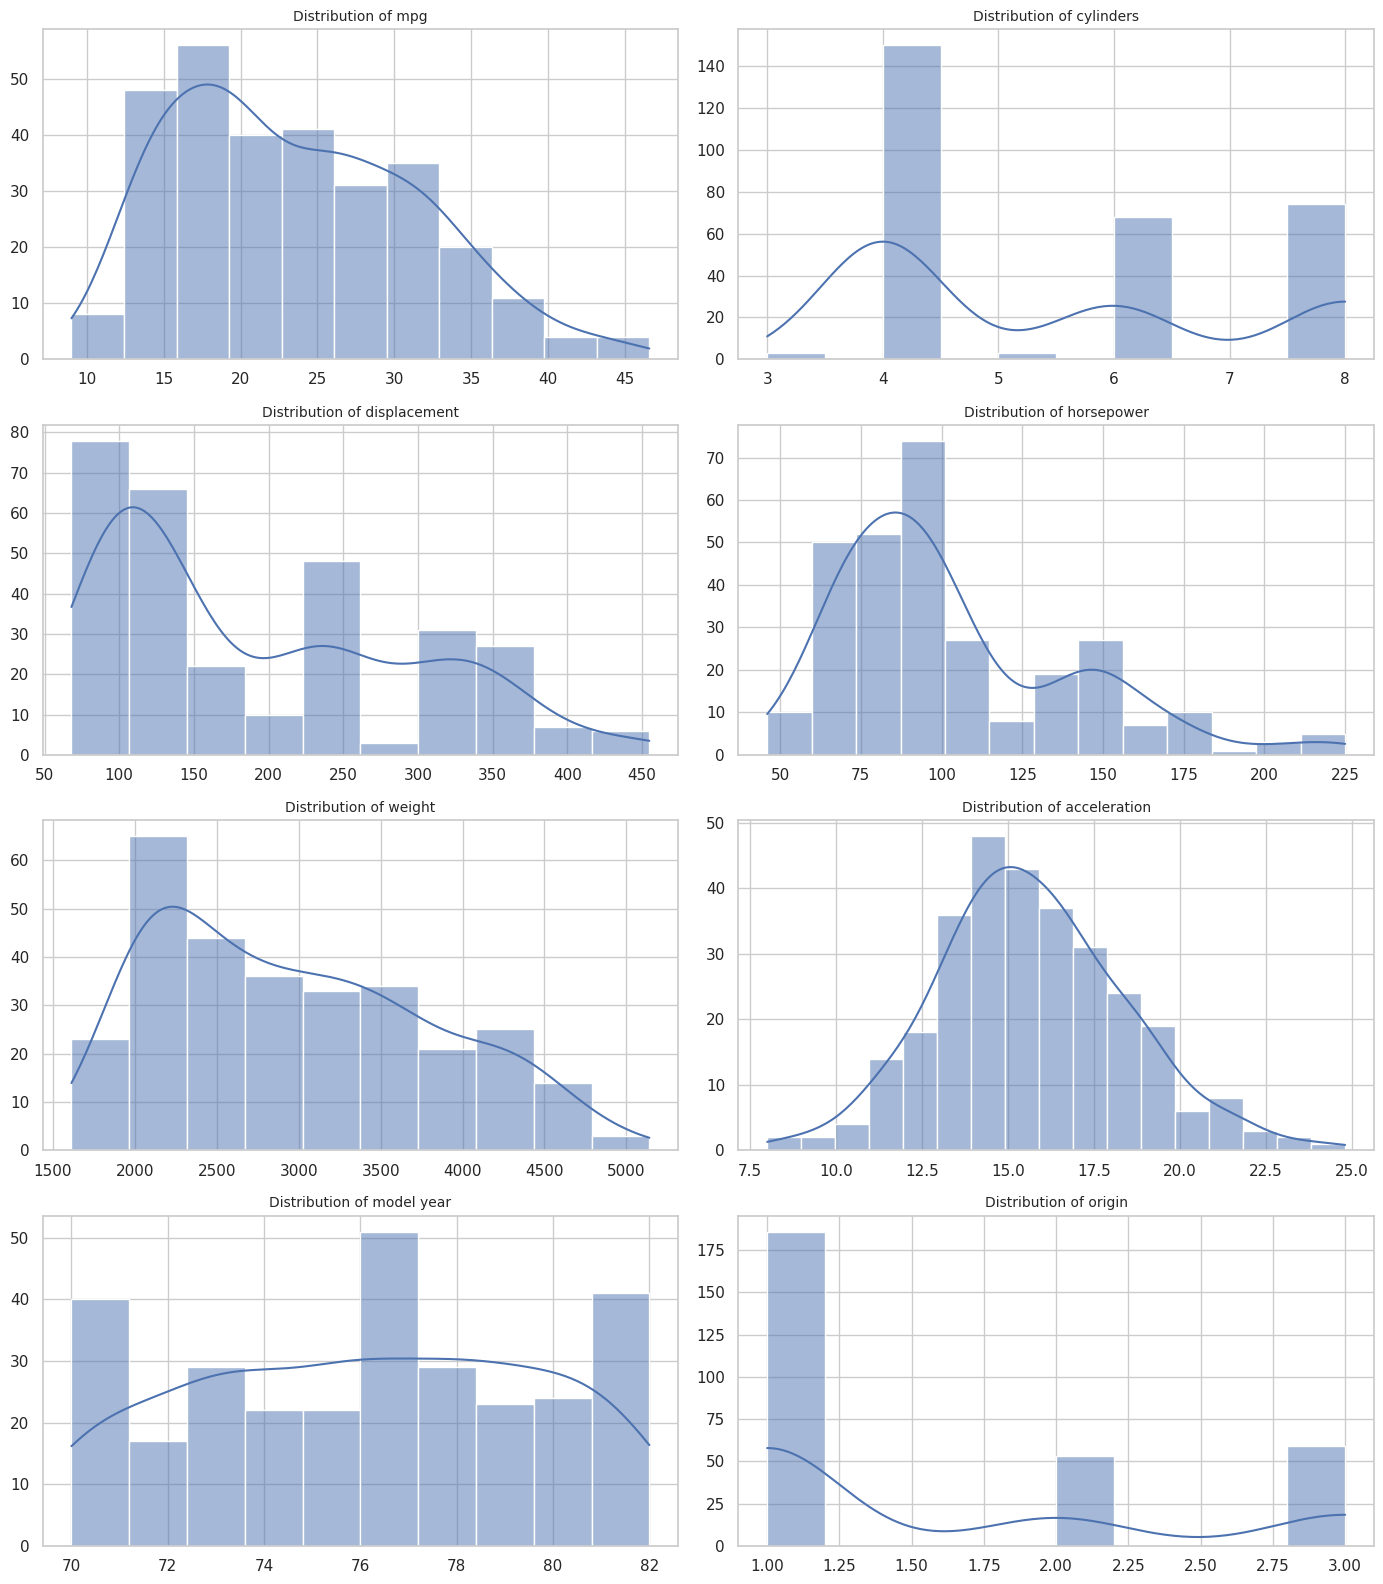

In [6]:
sns.set(style="whitegrid")

# Plotting histograms for numeric columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

for ax, column in zip(axes.flatten(), numeric_columns):
    sns.histplot(train_data[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


##4. **Build processing pipelines on** the basis of the nature of columns: numeric and symmetric, numeric and skewed, categorical.


##5. **Train and transform** the data in the pipeline, before outputting the transformed shapes of the training test dataset.

In [7]:
# Define transformers for different types of data
numeric_symmetric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),  # Using log1p to handle zero values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Columns assignments
numeric_symmetric_cols = ['acceleration']
numeric_skewed_cols = ['mpg', 'displacement', 'horsepower', 'weight']
categorical_cols = ['cylinders', 'model year', 'origin', 'car name']

# Column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num_sym', numeric_symmetric_transformer, numeric_symmetric_cols),
        ('num_skew', numeric_skewed_transformer, numeric_skewed_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the pipeline
train_transformed = preprocessor.fit_transform(train_data)
test_transformed = preprocessor.transform(test_data)

# Print the shape of the processed data
train_transformed.shape, test_transformed.shape


((298, 258), (100, 258))

- **Training data:** Comes to the shape of `(298, 258)`.
- The test data has been reshaped to `(100, 258)`.

 This increase in features to 258 is mostly because of one-hot encoding that happened in the categorical columns, further inflating the number of features based on the number of unique categories.
